In [65]:
%reload_ext autoreload
%autoreload 2

# MY HYPOTHESIS:


## Most of the students who are taking comp 110 have no previous experience in coding.



### First things first: I need to read the CSV and convert it into a column-oriented table.


In [66]:
from data_utils import columnar, read_csv_rows

data_rows: dict[str, list[str]] = read_csv_rows('../../data/survey.csv')
columns: dict[str, list[str]] = columnar(data_rows)

### Lets see if we can view this as a data table:


In [67]:
from data_utils import column_values, columnar, head, select

subset: dict[str, list[str]] = select(columns, ["prior_exp"])
sunset: dict[str, list[str]] = head(subset, 10)

from tabulate import tabulate

tabulate(sunset, sunset.keys(), "html")



prior_exp
None to less than one month!
None to less than one month!
None to less than one month!
None to less than one month!
None to less than one month!
Over 2 years
None to less than one month!
None to less than one month!
None to less than one month!
None to less than one month!


### So far it seems that our hypothesis is confirmed!

In the above table, it appears that approximately 9 out of 10 students do not have any prior programming experience.

## To confirm our hypothesis, let's see if the count associated with our all of our data is indicative of the trend we anaylzed in the previous data table.

In [68]:
from data_utils import count

counts: dict[str, int] = count(subset["prior_exp"])
print(f"exp_counts: {counts}")

exp_counts: {'None to less than one month!': 403, 'Over 2 years': 11, '2-6 months': 104, '7-12 months': 37, '1-2 years': 18}


## Let's view the ratio of students who do not have any previous experience in COMP SCI, to those who do:

In [69]:
from data_utils import addem_up

x = counts["None to less than one month!"]
y = addem_up(counts)

print(f"{x} / {y}")
print('''

==

''')
print(x / y)

403 / 573


==


0.7033158813263525


 ### If I've computed the statistics correct, this means that 7 out of 10 students in COMP 110 do not have any prior programming experience!! Which means that COMP 110 must be a stellar intro course to COMP SCI.

### To further analyze this claim, I will plot all of the data associated with column to determine if the trend follows the previous ratios determined.

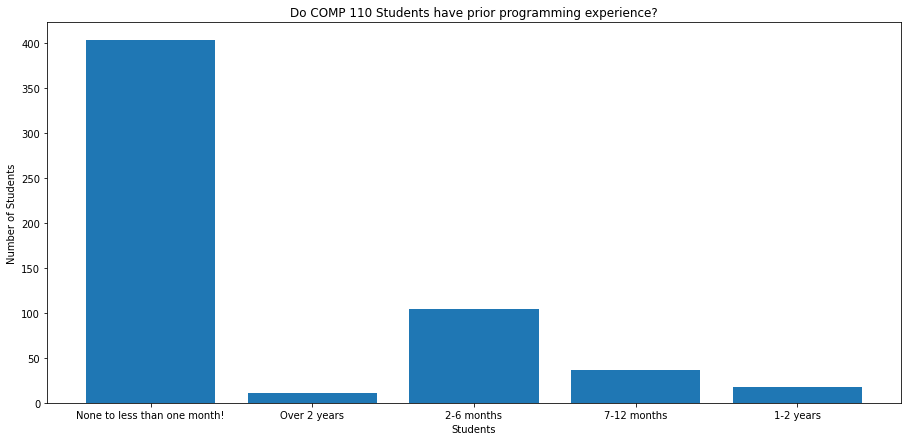

In [70]:
from matplotlib import pyplot as plt

names = counts.keys()
values = counts.values()

plt.figure(figsize=(52, 7))
plt.subplot(131)
plt.bar(names, values)
plt.title("Do COMP 110 Students have prior programming experience?")
plt.xlabel('Students')
plt.ylabel('Number of Students')
plt.show()


## Here it is! I believe my initial hypothesis was correct. It appears that nearly 7/10 students who are enrolled in this course did not bring any prior experience in programming to COMP 110. Therefore, it is safe to conlcude that most students enrolled/registered for COMP 110 do not have prior programming experience.